# Pandas CheatSheet

In [1]:
import pandas as pd

In [2]:
data = {
    'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
    'year': [2017, 2017, 2017, 2017, 2017],
    'salary': [40000, 24000, 31000, 20000, 30000]
}
d = pd.DataFrame(data)

## 查出薪水大于20000的人
.query(condition)

In [61]:
d.query('salary > 20000')
d[d.salary > 20000] # 与上面的结果相同

,name,year,salary,yyy
0,Alice,2017,40000,1
2,Charles,2017,31000,3
4,Eric,2017,30000,5
6,Hub,2017,40000,6


In [4]:
type(d.salary)

pandas.core.series.Series

In [5]:
d.query("name == 'Eric'")
d[d.name == 'Eric']

,name,year,salary
4,Eric,2017,30000


## 联合查询

In [6]:
d.query("name == 'Bob' and salary > 20000")

,name,year,salary
1,Bob,2017,24000


## 列选择

In [7]:
d.filter(items = ['name', 'year'])
d[['name', 'year']]

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


## 模糊查找

In [8]:
d.filter(like = 'n',axis = 1) #按列字段模糊查找

,name
0,Alice
1,Bob
2,Charles
3,David
4,Eric


---

In [9]:
df1 = pd.DataFrame({
    'Name' : ['Alice', 'Ada', 'Mallory', 'Mallory', 'Billy'],
    'City' : ['Sydney', 'Sydney', 'Paris', 'Sydney', 'Sydney']
})
df1

,Name,City
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney


## 分组

In [10]:
df1.groupby(['City']).count()

,Name
City,
Paris,1
Sydney,4


In [11]:
d.describe()

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


## skew
去掉Outlier 【query("salary == 40000") = 32000】

## DataFrame的增删改查

### 查

In [12]:
d.iloc[0]

name      Alice
year       2017
salary    40000
Name: 0, dtype: object

In [13]:
d.iloc[0]['salary'] #访问某一行的某一列：cell数值

40000

In [14]:
d.groupby(['name']).count().loc['Alice'] # iloc[0]

year      1
salary    1
Name: Alice, dtype: int64

In [15]:
d.iloc[:,0]

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [16]:
d.iloc[0,0]

'Alice'

In [17]:
d.iloc[0:2] # 0~1行

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,24000


In [18]:
d.iloc[0:2,1:] #打印前两行，后两列

,year,salary
0,2017,40000
1,2017,24000


### 改

In [19]:
# .at
d.at[1, 'salary'] = 0
d

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,0
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000


### 增

In [20]:
# 使用append增加行，用dict代表一行，不会改变原始的数据
d.append({
    'name' : 'Gerg',
    'year' : 2017,
    'salary' : 1500
}, ignore_index = True)

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,0
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000
5,Gerg,2017,1500


In [21]:
# 使用loc会改变原始数据
d.loc[6] = ['Hub', 2017, 40000]

In [22]:
# assign增加一列不会改变原始数据
d.assign(yyy = [1,2,3,4,5,6])

,name,year,salary,yyy
0,Alice,2017,40000,1
1,Bob,2017,0,2
2,Charles,2017,31000,3
3,David,2017,20000,4
4,Eric,2017,30000,5
6,Hub,2017,40000,6


In [23]:
# loc增加一列会改变原始数据
d.loc[:,'yyy'] = [1,2,3,4,5,6]

------

## Pandas绘图 plot/Seaborn

In [30]:
data3 = {
    'name' : ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'year' : [2012, 2012, 2013, 2014, 2014],
    'reports' : [4, 24, 31, 2, 31]
}
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,31


In [31]:
df3['reports']

Cochice        4
Pima          24
Santa Cruz    31
Maricopa       2
Yuma          31
Name: reports, dtype: int64

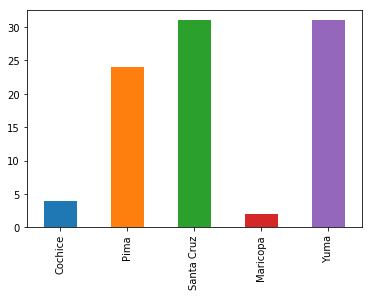

In [51]:
df3['reports'].plot.bar()
import matplotlib.pyplot as plt

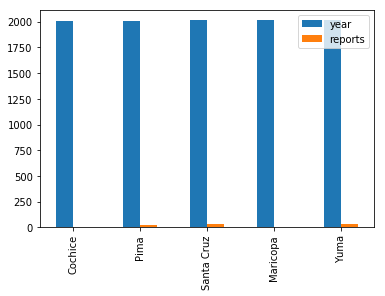

In [55]:
df3.plot.bar()

### Seaborn
### 核密度估计（kernel Densit Estimation）
单一变量的数值分布：平均分布、正态分布、偏态分布

In [62]:
import seaborn as sns

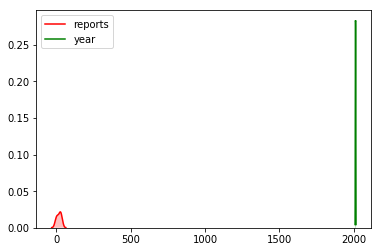

In [70]:
sns.kdeplot(df3['reports'], shade = True, color = 'r')
sns.kdeplot(df3['year'], shade = True, color = 'g')

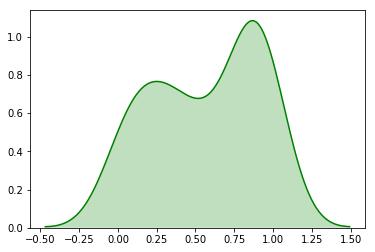

In [74]:
import numpy as np
x = np.random.rand(50)
sns.kdeplot(x, shade = True, color = 'g')